In [1]:
import numpy as np
# import cupy as cp
import torch
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

In [2]:
film = np.zeros((100, 100, 100))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom


for i in range(20):
    film[:, 60+i, 10:10+3*i] = 10

for j in range(20):
    film[:, 40-j, 10:10+3*j] = 10

film[:, :21, :70] = 10
film[:, 80:, :70] = 10
# indice_wall = np.array(film == 10)
# # in_depo = np.logical_and(result > 0, result < 1)
# # and plot everything
# ax = plt.figure().add_subplot(projection='3d')
# # ax.voxels(surface_depo, edgecolor='k')
# ax.voxels(indice_wall)
# # ax.voxels(in_depo)

# plt.show()

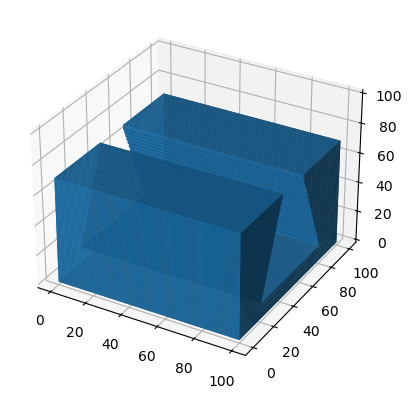

In [13]:
film = np.zeros((100, 100, 100))

bottom = 70
film[:, :, 0:bottom] = 10 # bottom


for i in range(20):
    film[:, 20+i, 10:10+3*i] = 0

for j in range(20):
    film[:, 80-j, 10:10+3*j] = 0

film[:, 40:61, 10:70] = 0
# film[:, 61, 10:70] = 0
indice_wall = np.array(film == 10)
# in_depo = np.logical_and(result > 0, result < 1)
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(surface_depo, edgecolor='k')
ax.voxels(indice_wall)
# ax.voxels(in_depo)

plt.show()

In [5]:
from scipy.sparse import bsr_matrix

In [14]:
t  = torch.zeros((10, 10, 10))
t[1,1,1] = 1
print(t.shape)
t.dim()
print(t.shape)
print(t)
tsparse = t.to_sparse()

torch.Size([10, 10, 10])
torch.Size([10, 10, 10])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 

In [17]:
print(tsparse)
print(tsparse[0,0,0])

tensor(indices=tensor([[1],
                       [1],
                       [1]]),
       values=tensor([1.]),
       size=(10, 10, 10), nnz=1, layout=torch.sparse_coo)
tensor(0.)


In [ ]:
def scanZ(film):
    zmap = np.zeros((100, 100))
    zshape = film.shape[2]
    print(zshape)
    for i in range(zshape):
        for j in range(100):
            for k in range(100):
                if film[j, k, i] == 0 and film[j, k, i-1] != 0:
                    zmap[j,k] = i
    return zmap

In [25]:
def scanZ(film):
    x = []
    y = []
    z = []
    zshape = film.shape[2]
    print(zshape)
    for i in range(zshape):
        for j in range(100):
            for k in range(100):
                if film[j, k, i] == 0 and film[j, k, i-1] != 0:
                    x.append(j)
                    y.append(k)
                    z.append(i)
    print(len(x))
    print(len(y))
    print(len(z))
    surface_matrix = bsr_matrix((np.array(z), (np.array(x), np.array(y))), shape=(len(x), len(y)))
    
    return surface_matrix

In [23]:
def scanZmin(film):
    zmap = np.zeros((100, 100))
    zshape = film.shape[2]
    print(zshape)
    for i in range(zshape):
        for j in range(100):
            for k in range(100):
                if film[j, k, zshape-1-i] == 0 and film[j, k, zshape-i] != 0:
                    zmap[j,k] = i
    return zmap

In [24]:
def mesh_normal(p1, p2, p3):
    origin_Z = (p1[2] + p2[2] + p3[2])/3
    origin_X = (p1[0] + p2[0] + p3[0])/3
    origin_Y = (p1[1] + p2[1] + p3[1])/3
    a = p1 - p2
    b = p2 - p3

    c = np.cross(a, b)
    c_normal = np.linalg.norm(c)
    n = c/c_normal
    return n, np.array([origin_X, origin_Y, origin_Z])

In [26]:
test = scanZ(film)
print(test)

100
13800
13800
13800
  (0, 0)	70
  (0, 1)	70
  (0, 2)	70
  (0, 3)	70
  (0, 4)	70
  (0, 5)	70
  (1, 0)	70
  (1, 1)	70
  (1, 2)	70
  (1, 3)	70
  (1, 4)	70
  (1, 5)	70
  (2, 0)	70
  (2, 1)	70
  (2, 2)	70
  (2, 3)	70
  (2, 4)	70
  (2, 5)	70
  (3, 0)	70
  (3, 1)	70
  (3, 2)	70
  (3, 3)	70
  (3, 4)	70
  (3, 5)	70
  (4, 0)	70
  :	:
  (97, 101)	0
  (98, 96)	70
  (98, 97)	70
  (98, 98)	70
  (98, 99)	70
  (98, 100)	0
  (98, 101)	0
  (99, 96)	70
  (99, 97)	70
  (99, 98)	70
  (99, 99)	70
  (99, 100)	0
  (99, 101)	0
  (100, 96)	0
  (100, 97)	0
  (100, 98)	0
  (100, 99)	0
  (100, 100)	0
  (100, 101)	0
  (101, 96)	0
  (101, 97)	0
  (101, 98)	0
  (101, 99)	0
  (101, 100)	0
  (101, 101)	0


In [28]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 0, 2, 0, 1, 2])
data = np.array([1, 2, 3 ,4, 5, 6])
bsr_matrix((data, (row, col)), shape=(6, 6)).toarray()

array([[3, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [4, 5, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int32)

In [26]:
test[20:30, :]

array([[70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70.],
       [70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10., 10., 10., 10., 10., 10., 10., 10., 10., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70

In [27]:
test = scanZmin(film)
print(test)

100


IndexError: index 100 is out of bounds for axis 2 with size 100

In [68]:
def get_normal(film):
    normal_film = np.zeros((film.shape[0], film.shape[1], 3))
    origin_film = np.zeros((film.shape[0], film.shape[1], 3))
    for i in range(film.shape[0]-1):
        for j in range(film.shape[1]-1):
            if i%2 == 0:
                n1, o1 = mesh_normal(np.array([i,j,film[i, j]]), np.array([i,j+1,film[i, j+1]]), np.array([i+1,j+1,film[i+1, j+1]]))
                # print(n1)
                normal_film[i,j] = -n1
                origin_film[i,j] = o1
            else:
                n2, o2 = mesh_normal(np.array([i,j,film[i, j]]), np.array([i+1,j,film[i+1, j]]), np.array([i+1,j+1,film[i+1, j+1]]))
                # print(n2)
                normal_film[i,j] = n2
                origin_film[i,j] = o2
    return normal_film, origin_film 

In [70]:
normal_test, origin_test = get_normal(test)

In [78]:
test = np.random.randint(90,100,size=(100, 100))
print(test)
normal_test, origin_test = get_normal(test)

[[99 98 93 ... 93 98 94]
 [92 93 91 ... 91 91 98]
 [90 95 98 ... 92 94 95]
 ...
 [99 92 99 ... 90 91 92]
 [91 90 97 ... 98 91 91]
 [96 97 95 ... 96 90 96]]


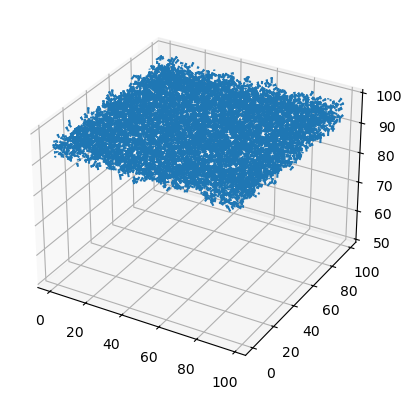

In [83]:
ax = plt.figure().add_subplot(projection='3d')

ax.quiver(origin_test[:,:,0],origin_test[:,:,1],origin_test[:,:,2], normal_test[:,:,0],normal_test[:,:,1],normal_test[:,:,2], length=2, normalize=True)
ax.set_zlim(50,100)
plt.show()

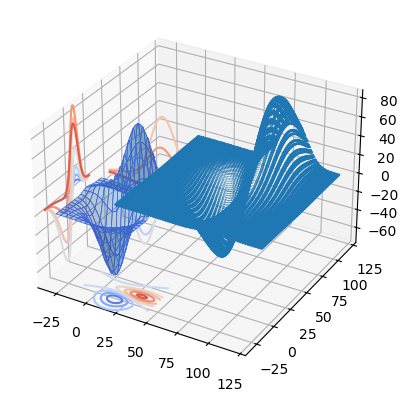

In [92]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
normal_test, origin_test = get_normal(Z)
ax.quiver(origin_test[:,:,0],origin_test[:,:,1],origin_test[:,:,2], normal_test[:,:,0],normal_test[:,:,1],normal_test[:,:,2], length=2, normalize=True)
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

# ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
#        xlabel='X', ylabel='Y', zlabel='Z')

# plt.show()

In [91]:
Z.shape

(120, 120)

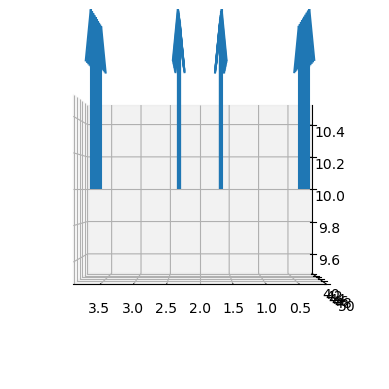

In [67]:
ax = plt.figure().add_subplot(projection='3d')

ax.quiver(origin_test[:4,40:50,0],origin_test[:4,40:50,1],origin_test[:4,40:50,2], normal_test[:4,40:50,0],normal_test[:4,40:50,1],normal_test[:4,40:50,2], normalize=True)
ax.view_init(elev=0, azim=90, roll=0)
plt.show()


In [85]:
X.shape

(120, 120)

In [29]:
test[20:30, 20:30]

array([[70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.],
       [70., 67., 64., 61., 58., 55., 52., 49., 46., 43.]])

In [4]:
def mesh_normal(p1, p2, p3):
    origin_Z = (p1[2] + p2[2] + p3[2])/3
    origin_X = (p1[0] + p2[0] + p3[0])/3
    origin_Y = (p1[1] + p2[1] + p3[1])/3
    a = p1 - p2
    b = p2 - p3
    c = np.cross(a, b)
    c_normal = np.linalg.norm(c)
    n = c/c_normal
    return n, np.array([origin_X, origin_Y, origin_Z])